# WSU Impact Assessment Examples

This notebook provides examples of some calculations that can be done using the data bases estimating the properties of WSU data based on current data taken in cycles 7 and 8. This data base does NOT include data from Band 1 and Band 2, which will be the most challenging use cases because they are the lowest frequencies

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import QTable, vstack
from importlib import reload
import re

## Read in files

Reading in using ecsv and QTable is recommended to get unit information.

In [6]:
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20230109.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20230109.ecsv')

Take a look at the tables. Note that the values that should have units do have units indicated.

In [7]:
result_c7_mous

mous,proposal_id,array,nant_typical,nant_array,nant_all,band,ntarget,s_fov,s_resolution,mosaic,imsize,pb,cell,blc_npol,blc_nspw,blc_specwidth,blc_freq,blc_velres,blc_nchan_agg,blc_nchan_max,blc_bandwidth_max,blc_bandwidth_agg,wsu_freq,wsu_npol,wsu_bandwidth_early,wsu_bandwidth_later_2x,wsu_bandwidth_later_4x,wsu_bandwidth_spw,wsu_nspw_early,wsu_nspw_later_2x,wsu_nspw_later_4x,wsu_specwidth_finest,wsu_chanavg_finest,wsu_velres_finest,wsu_specwidth_stepped,wsu_chanavg_stepped,wsu_velres_stepped,wsu_specwidth_stepped2,wsu_chanavg_stepped2,wsu_velres_stepped2,wsu_tint,wsu_nchan_spw_finest,wsu_nchan_spw_stepped,wsu_nchan_spw_stepped2,wsu_frac_bw_early,wsu_frac_bw_later_2x,wsu_frac_bw_later_4x,wsu_frac_bw_spw,nbase_typical,nbase_array,nbase_all,L80,blc_tint,bp_time,flux_time,phase_time,pol_time,check_time,target_time_tot,time_tot,cal_time,mfssize,wsu_cubesize_stepped2,wsu_productsize_early_stepped2,wsu_datarate_early_stepped2_typical,wsu_visrate_early_stepped2_typical,wsu_datavol_early_stepped2_typical_target_tot,wsu_datavol_early_stepped2_typical_cal,wsu_datavol_early_stepped2_typical_total,wsu_nvis_early_stepped2_typical_target_tot,wsu_nvis_early_stepped2_typical_cal,wsu_nvis_early_stepped2_typical_total,wsu_productsize_later_2x_stepped2,wsu_datarate_later_2x_stepped2_typical,wsu_visrate_later_2x_stepped2_typical,wsu_datavol_later_2x_stepped2_typical_target_tot,wsu_datavol_later_2x_stepped2_typical_cal,wsu_datavol_later_2x_stepped2_typical_total,wsu_nvis_later_2x_stepped2_typical_target_tot,wsu_nvis_later_2x_stepped2_typical_cal,wsu_nvis_later_2x_stepped2_typical_total,wsu_productsize_later_4x_stepped2,wsu_datarate_later_4x_stepped2_typical,wsu_visrate_later_4x_stepped2_typical,wsu_datavol_later_4x_stepped2_typical_target_tot,wsu_datavol_later_4x_stepped2_typical_cal,wsu_datavol_later_4x_stepped2_typical_total,wsu_nvis_later_4x_stepped2_typical_target_tot,wsu_nvis_later_4x_stepped2_typical_cal,wsu_nvis_later_4x_stepped2_typical_total,blc_datarate_typical,blc_visrate_typical,blc_datavol_typical_target_tot,blc_datavol_typical_cal,blc_datavol_typical_total,blc_nvis_typical_target_tot,blc_nvis_typical_cal,blc_nvis_typical_total,plversion,procedure,nant,pl_totaltime,pl_imgtime,pl_cubetime,pl_aggtime,pl_fctime,nEB,npt,nscan,reptgt,allowedcubesize,allowedcubelimit,predcubesize,mitigatedcubesize,allowedprodsize,initialprodsize,mitigatedprodsize,mitigated,mit_nbins,mit_hm_imsize,mit_hm_cell,mit_field,mit_spw,pl_caltime
,,,,,,,,deg,arcsec,,,arcsec,arcsec,,,kHz,GHz,km / s,,,GHz,GHz,GHz,,GHz,GHz,GHz,GHz,,,,kHz,,km / s,kHz,,km / s,kHz,,km / s,s,,,,,,,,,,,m,s,s,s,s,s,s,s,s,s,Gbyte,Gbyte,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,,,,h,h,h,h,h,,,,,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,,,,,,,h
str22,str14,str3,int64,int64,int64,float64,float64,float64,float64,str1,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str20,object,object,object,object,object,object,object,object,object,str29,object,object,object,object,object,object,object,object,str64,str7,str7,str846,str54,object
uid://A001/X1465/X1002,2019.1.01326.S,7m,10,12,16,3.0,1.0,0.13050363616709187,12.418751976046456,T,220.0,108.514167152526,2.483750395209291,2,4,965.2043680

In [8]:
result_c7_mous.columns

<TableColumns names=('mous','proposal_id','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','blc_tint','bp_time','flux_time','phase_time','pol_time','check_time','target_time_tot','time_tot','cal_time','mfssize',

In [9]:
result_c8_mous

mous,proposal_id,array,nant_typical,nant_array,nant_all,band,ntarget,s_fov,s_resolution,mosaic,imsize,pb,cell,blc_npol,blc_nspw,blc_specwidth,blc_freq,blc_velres,blc_nchan_agg,blc_nchan_max,blc_bandwidth_max,blc_bandwidth_agg,wsu_freq,wsu_npol,wsu_bandwidth_early,wsu_bandwidth_later_2x,wsu_bandwidth_later_4x,wsu_bandwidth_spw,wsu_nspw_early,wsu_nspw_later_2x,wsu_nspw_later_4x,wsu_specwidth_finest,wsu_chanavg_finest,wsu_velres_finest,wsu_specwidth_stepped,wsu_chanavg_stepped,wsu_velres_stepped,wsu_specwidth_stepped2,wsu_chanavg_stepped2,wsu_velres_stepped2,wsu_tint,wsu_nchan_spw_finest,wsu_nchan_spw_stepped,wsu_nchan_spw_stepped2,wsu_frac_bw_early,wsu_frac_bw_later_2x,wsu_frac_bw_later_4x,wsu_frac_bw_spw,nbase_typical,nbase_array,nbase_all,L80,blc_tint,bp_time,flux_time,phase_time,pol_time,check_time,target_time_tot,time_tot,cal_time,mfssize,wsu_cubesize_stepped2,wsu_productsize_early_stepped2,wsu_datarate_early_stepped2_typical,wsu_visrate_early_stepped2_typical,wsu_datavol_early_stepped2_typical_target_tot,wsu_datavol_early_stepped2_typical_cal,wsu_datavol_early_stepped2_typical_total,wsu_nvis_early_stepped2_typical_target_tot,wsu_nvis_early_stepped2_typical_cal,wsu_nvis_early_stepped2_typical_total,wsu_productsize_later_2x_stepped2,wsu_datarate_later_2x_stepped2_typical,wsu_visrate_later_2x_stepped2_typical,wsu_datavol_later_2x_stepped2_typical_target_tot,wsu_datavol_later_2x_stepped2_typical_cal,wsu_datavol_later_2x_stepped2_typical_total,wsu_nvis_later_2x_stepped2_typical_target_tot,wsu_nvis_later_2x_stepped2_typical_cal,wsu_nvis_later_2x_stepped2_typical_total,wsu_productsize_later_4x_stepped2,wsu_datarate_later_4x_stepped2_typical,wsu_visrate_later_4x_stepped2_typical,wsu_datavol_later_4x_stepped2_typical_target_tot,wsu_datavol_later_4x_stepped2_typical_cal,wsu_datavol_later_4x_stepped2_typical_total,wsu_nvis_later_4x_stepped2_typical_target_tot,wsu_nvis_later_4x_stepped2_typical_cal,wsu_nvis_later_4x_stepped2_typical_total,blc_datarate_typical,blc_visrate_typical,blc_datavol_typical_target_tot,blc_datavol_typical_cal,blc_datavol_typical_total,blc_nvis_typical_target_tot,blc_nvis_typical_cal,blc_nvis_typical_total,plversion,procedure,nant,pl_totaltime,pl_imgtime,pl_cubetime,pl_aggtime,pl_fctime,nEB,npt,nscan,reptgt,allowedcubesize,allowedcubelimit,predcubesize,mitigatedcubesize,allowedprodsize,initialprodsize,mitigatedprodsize,mitigated,mit_nbins,mit_hm_imsize,mit_hm_cell,mit_field,mit_spw,pl_caltime
,,,,,,,,deg,arcsec,,,arcsec,arcsec,,,kHz,GHz,km / s,,,GHz,GHz,GHz,,GHz,GHz,GHz,GHz,,,,kHz,,km / s,kHz,,km / s,kHz,,km / s,s,,,,,,,,,,,m,s,s,s,s,s,s,s,s,s,Gbyte,Gbyte,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,,,,h,h,h,h,h,,,,,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,,,,,,,h
str22,str14,str3,int64,int64,int64,float64,float64,float64,float64,str1,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str20,object,object,object,object,object,object,object,object,object,str29,object,object,object,object,object,object,object,object,str64,str7,str7,str769,str44,object
uid://A001/X158f/X111,2021.1.01571.S,12m,47,54,66,8.0,1.0,0.004000240613311581,0.45833271459124353,F,240.0,14.397483872538897,0.0916665429182487,2,4,31176.

In [10]:
result_c8_mous.columns

<TableColumns names=('mous','proposal_id','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','blc_tint','bp_time','flux_time','phase_time','pol_time','check_time','target_time_tot','time_tot','cal_time','mfssize',

## Data properties

Text(0.5, 0, 'log 80th percentile baseline')

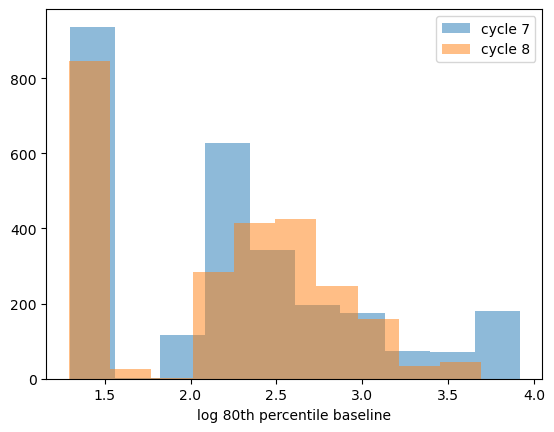

In [28]:
plt.hist(np.log10(result_c7_mous['L80'].value),alpha=0.5,label='cycle 7')
plt.hist(np.log10(result_c8_mous['L80'].value),alpha=0.5, label='cycle 8')
plt.legend()
plt.xlabel('log 80th percentile baseline')

 Cycle 7 included long baselines while cycle 8 did not.


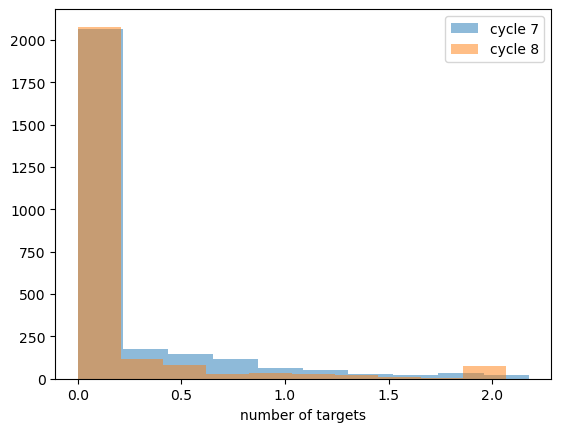

In [31]:
plt.hist(np.log10(result_c7_mous['ntarget']),alpha=0.5, label='cycle 7')
plt.hist(np.log10(result_c8_mous['ntarget']),alpha=0.5,label='cycle 8')
plt.xlabel('number of targets')
plt.legend()

Text(0.5, 0, ' BLC --- number of spectral windows')

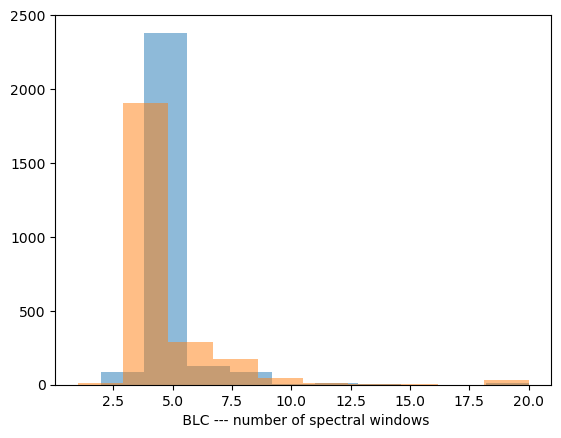

In [59]:
plt.hist(result_c7_mous['blc_nspw'],alpha=0.5,label='cycle 7')
plt.hist(result_c8_mous['blc_nspw'],alpha=0.5,label='cycle 8')
plt.xlabel(' BLC --- number of spectral windows')

In [82]:
idx = (result_c7_mous['blc_nspw'] ==  20) & (result_c7_mous['ntarget'] == 1) 
result_c7_mous[idx]['proposal_id','mous','ntarget','blc_nspw','band'].show_in_browser()

In [83]:
idx = (result_c7_mous['blc_nspw'] ==  20) 
result_c7_mous[idx]['proposal_id','mous','ntarget','blc_nspw','band'].show_in_browser()

## BLC Data Rates

Text(0.5, 1.0, 'cycle 7')

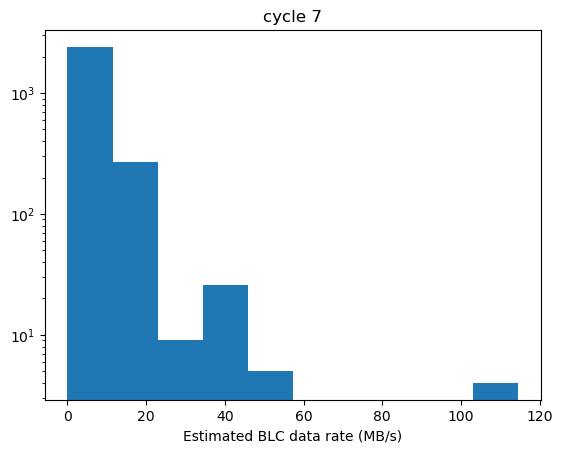

In [41]:
plt.hist(result_c7_mous['blc_datarate_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated BLC data rate (MB/s)')
plt.title('cycle 7')

In [33]:
np.max(result_c7_mous['blc_datarate_typical'].to(u.MB/u.s))

<Quantity 114.59047619 Mbyte / s>

In [66]:
idx = result_c7_mous['blc_datarate_typical'].to(u.MB/u.s).value > 70.0
result_c7_mous[idx]['proposal_id','mous','L80','ntarget','blc_nchan_agg','blc_nspw','blc_npol','blc_datarate_typical','nant','nant_typical']

proposal_id,mous,L80,ntarget,blc_nchan_agg,blc_nspw,blc_npol,blc_datarate_typical,nant,nant_typical
,,m,,,,,Gbyte / s,,
str14,str22,float64,float64,float64,int64,int64,float64,object,int64
2019.1.00571.S,uid://A001/X1465/X2b59,4031.1516,1.0,38400.0,20,2,0.1145904761904762,45,47
2019.1.00092.S,uid://A001/X1465/X3a33,230.4108,1.0,76800.0,20,2,0.11455259504132233,--,47
2019.1.00092.S,uid://A001/X1465/X3a3f,141.1977,1.0,76800.0,20,2,0.11455259504132233,--,47
2019.1.00092.S,uid://A001/X1465/X3a43,132.02803,1.0,76800.0,20,2,0.11455259504132233,--,47


Why are these projects higher the the cap (70MB/s)? The numbers match the info in the weblog.

* 2019.1.00571.S is a spectral scan, so the actual data rate is lower because the setups are observed one after another.
* 2019.1.00092.S is also a spectral scan, so the actual data rate is lower than estimated because the different setups are observed on after another.


Text(0.5, 1.0, 'cycle 8')

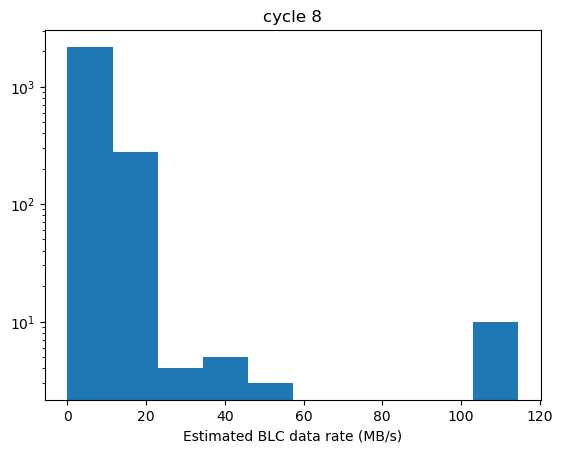

In [42]:
plt.hist(result_c8_mous['blc_datarate_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated BLC data rate (MB/s)')
plt.title('cycle 8')

In [67]:
idx = result_c8_mous['blc_datarate_typical'].to(u.MB/u.s).value > 70.0
result_c8_mous[idx]['proposal_id','mous','L80','ntarget','blc_nchan_agg','blc_nspw','blc_npol','blc_datarate_typical','nant','nant_typical']

proposal_id,mous,L80,ntarget,blc_nchan_agg,blc_nspw,blc_npol,blc_datarate_typical,nant,nant_typical
,,m,,,,,Gbyte / s,,
str14,str22,float64,float64,float64,int64,int64,float64,object,int64
2021.1.01543.S,uid://A001/X158f/X13e,115.18967,1.0,76800.0,20,2,0.11455259504132233,--,47
2021.1.01543.S,uid://A001/X158f/X142,129.0898,1.0,76800.0,20,2,0.11455259504132233,42,47
2021.1.01543.S,uid://A001/X158f/X146,134.33105,1.0,76800.0,20,2,0.11455259504132233,44,47
2021.1.01543.S,uid://A001/X158f/X14a,123.74107,1.0,76800.0,20,2,0.11455259504132233,42,47
2021.1.01543.S,uid://A001/X158f/X166,116.09356,1.0,76800.0,20,2,0.11455259504132233,46,47
2021.1.01164.S,uid://A001/X15a1/X1078,309.0652,1.0,76800.0,20,2,0.11455259504132233,--,47
2021.1.01056.S,uid://A001/X15a1/X48a,3057.717,1.0,38400.0,20,2,0.1145904761904762,47,47
2021.1.01056.S,uid://A001/X15a1/X48e,3103.365,1.0,38400.0,20,2,0.1145904761904762,47,47


## Properties of WSU data

## Properties of WSU image products

In [ ]:
# biggest c7 cube
np.max(result_c7_mous['wsu_cubesize_stepped2'])

In [ ]:
# biggest c8 cube
np.max(result_c8_mous['wsu_cubesize_stepped2'])

C7 had long baselines and C8 didn't, so C7 has a larger max cube size

In [ ]:
# biggest c7, 7m cube
idx = result_c7_mous['array'] == '7m'
np.max(result_c7_mous['wsu_cubesize_stepped2'][idx])

In [ ]:
# sum of all c7, 7m products in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_productsize_early_stepped2'][idx]).to('PB')

In [ ]:
# sum of all c7 wsu products in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_productsize_early_stepped2']).to('PB')

In [ ]:
# sum of all c7 wsu products in "later 2x" WSU -- all bands have 2x BW
np.sum(result_c7_mous['wsu_productsize_later_2x_stepped2']).to('PB')

In [ ]:
# sum of all c7 wsu products in "later 4x" WSU -- all bands have 4x BW
np.sum(result_c7_mous['wsu_productsize_later_4x_stepped2']).to('PB')

In [ ]:
# total number of cubes produced in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_nspw_early'] * result_c7_mous['ntarget'])

In [ ]:
# total number of cubes produced in "later 2x" WSU -- all bands have 2x BW
np.sum(result_c7_mous['wsu_nspw_later_2x'] * result_c7_mous['ntarget'])

In [ ]:
# total number of cubes produced today
np.sum(result_c7_mous['blc_nspw'] * result_c7_mous['ntarget'])

## Calibration time scaling

In [ ]:
plt.hist(result_c7_mous['totaltime'].value)
plt.xlabel('total pipeline time (h)')

In [ ]:
plt.hist(result_c7_mous['imgtime'].value)
plt.xlabel('total imaging pipeline time (h)')

In [ ]:
result_c7_mous['pl_caltime'] = result_c7_mous['totaltime'] - result_c7_mous['imgtime']

In [ ]:
plt.hist(result_c7_mous['pl_caltime'].value)

In [ ]:
plt.scatter(result_c7_mous['blc_nvis_typical_cal'],result_c7_mous['pl_caltime'])
plt.scatter()

In [ ]:
plt.scatter(result_c7_mous['blc_nvis_typical_total'],result_c7_mous['pl_caltime'])

## Data Rates